##### Cyberbullying, Juan Garcia, Programming for Data Analytics, CISA 4313:600, Fall 2022 ##### 

### Modules

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import tensorflow
import keras as ke
from keras import layers
from keras.models import Sequential
from sklearn.feature_extraction.text import *
from sklearn.feature_selection import *
import warnings
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

### Import CSV

In [2]:
#Importing the file from a CSV
cb_df = pd.read_csv('cyberbullying_tweets.csv')
#dropping the first line in the df.
cb_df = cb_df.iloc[1:, :]
cb_df.head()

tweet_text cyberbullying_type
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying

In [3]:
cb_df.shape

(11957, 2)

### PreProcessing

In [4]:
#stopwords that are going to be used in the preprocessing
stop_words = set(stopwords.words('english'))

In [5]:
#created a function that pre-process, numbers, urls etc.
def data_processing(tweet_text):
    tweet_text = tweet_text.lower()
    tweet_text = re.sub(r'https\S+|www\S+http\S+', '', tweet_text, flags = re.MULTILINE)
    tweet_text = re.sub(r'\@w+|\#', '', tweet_text)
    tweet_text = re.sub(r'[^\w\s]', '', tweet_text)
    tweet_text = re.sub('[0-9]+', '', tweet_text)
    #tokenizing the tweet_text
    tweet_text_tokens = word_tokenize(tweet_text)
    filtered_tweet_text = [word for word in tweet_text_tokens if not word_tokenize in stop_words]
    return " ".join(filtered_tweet_text)

In [6]:
#applying the data_processings
cb_df.tweet_text = cb_df['tweet_text'].apply(data_processing)

In [7]:
#dropping any duplciated in the df.
cb_df = cb_df.drop_duplicates('tweet_text')
cb_df.head()

tweet_text cyberbullying_type
1  why is aussietv so white mkr theblock imaceleb...  not_cyberbullying
2  xochitlsuckkks a classy whore or more red velv...  not_cyberbullying
3  jason_gio meh p thanks for the heads up but no...  not_cyberbullying
4  rudhoeenglish this is an isis account pretendi...  not_cyberbullying
5  rajaaab quickieleaks yes the test of god is th...  not_cyberbullying

### Pie Chart Distribution

In [8]:
#using a pie chart to look at the distribution by Cyberbullying Type
top_prod = cb_df.groupby('cyberbullying_type').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False)
fig = px.pie(top_prod, values='total', names='cyberbullying_type', color_discrete_sequence=px.colors.sequential.RdBu, title="Cyberbullying Type")
fig.show()

### Label Econdoding

In [92]:
#label encoding the Cyberbullying Type to ints.
lenc = preprocessing.LabelEncoder()
cb_df['cyberbullying_type'] = lenc.fit_transform(cb_df.cyberbullying_type.values)
cb_df['cyberbullying_type']
lenc.classes_

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [93]:
# Value counts of each Cyberbullying Type.
cb_df["cyberbullying_type"].value_counts()

5    1995
1    1994
2    1992
0    1988
3    1978
4    1875
Name: cyberbullying_type, dtype: int64

### Lemmantizing

In [94]:
#Combining words that share similar roots words, such as leaf and leaves.
lem = WordNetLemmatizer()
def lemmatizing(data):
    tweet_text = [lem.lemmatize(word) for word in data]
    return data

In [95]:
#appplying lemmantizing to the df.
cb_df['tweet_text'] = cb_df['tweet_text'].apply(lambda x: lemmatizing(x))

In [96]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 1 to 11957
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          11822 non-null  object
 1   cyberbullying_type  11822 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 535.1+ KB


### Word Frequencies

In [97]:
# Creating a histogram of the word frequencies
all_words = cb_df['tweet_text'].str.split(expand=True).unstack().value_counts()
py.init_notebook_mode()
data = [go.Bar(
            x = all_words.index.values[0:50],
            y = all_words.values[0:50],
            marker= dict(colorscale='RdBu',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Word frequencies'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')
plt.show()

### WordClouds

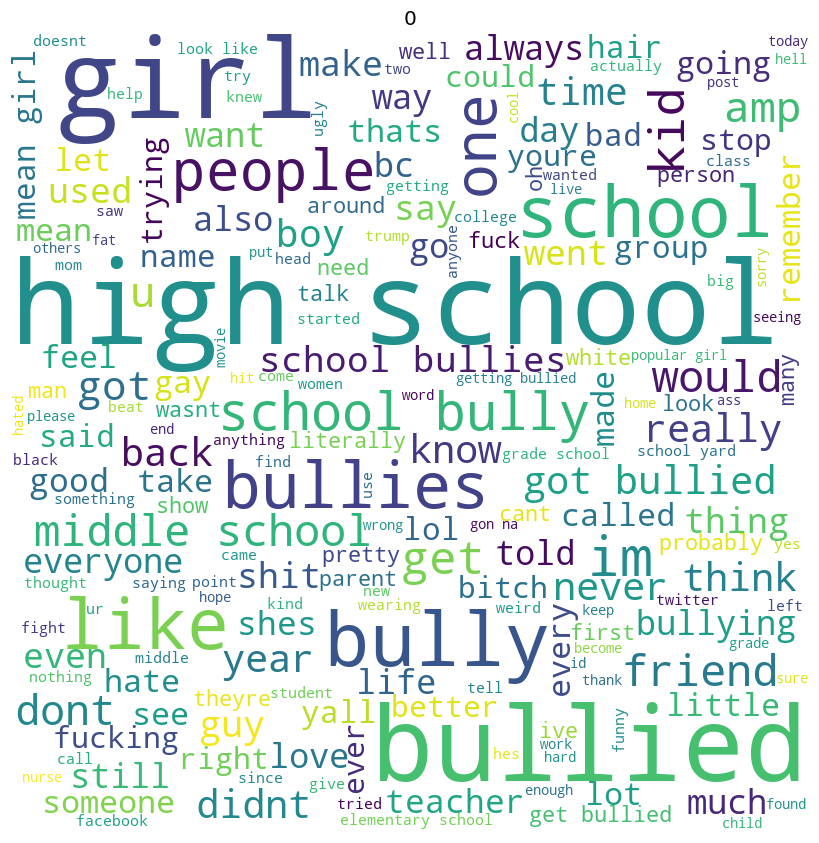

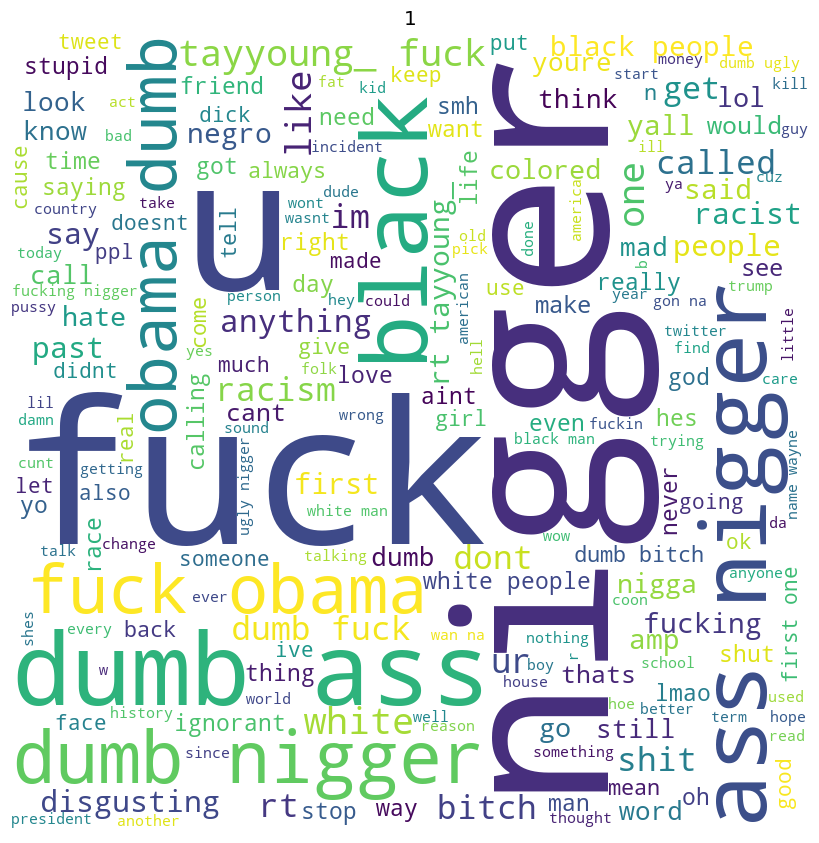

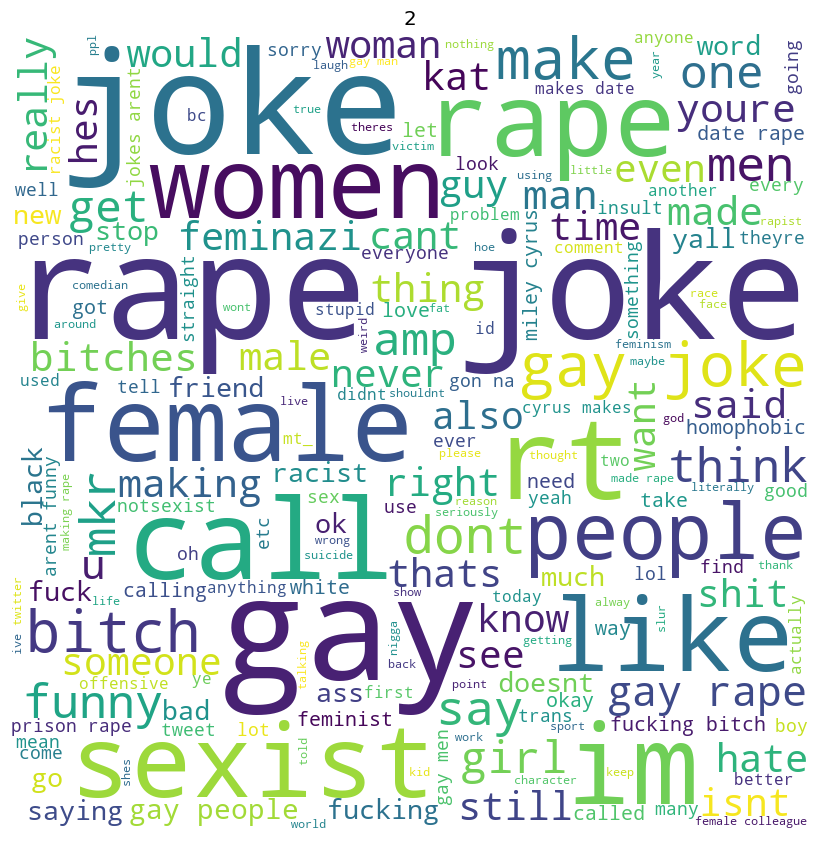

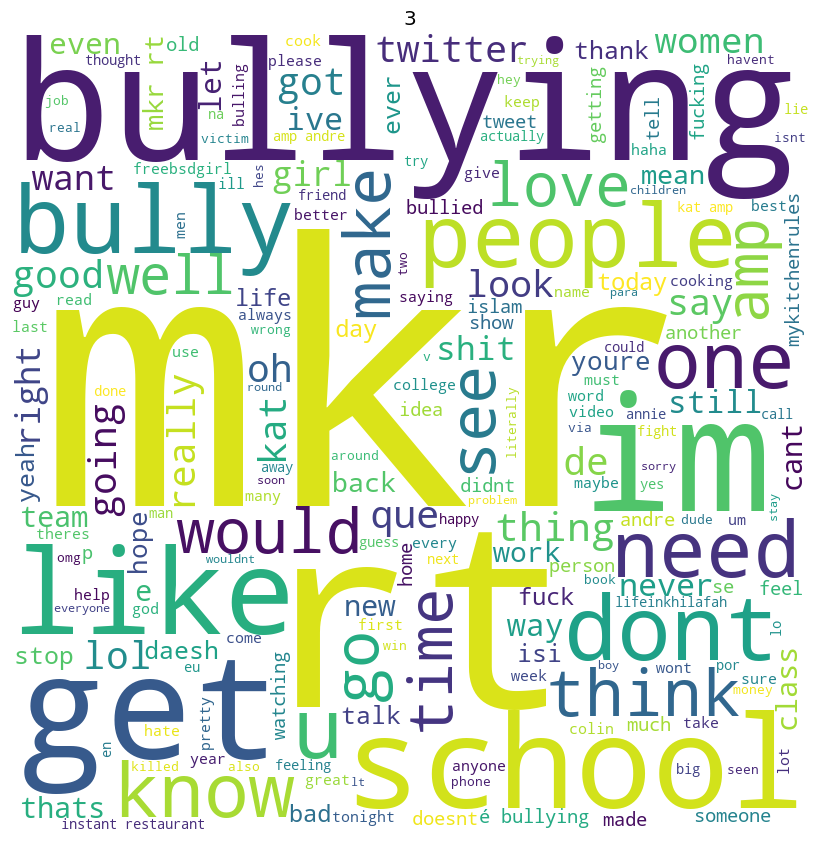

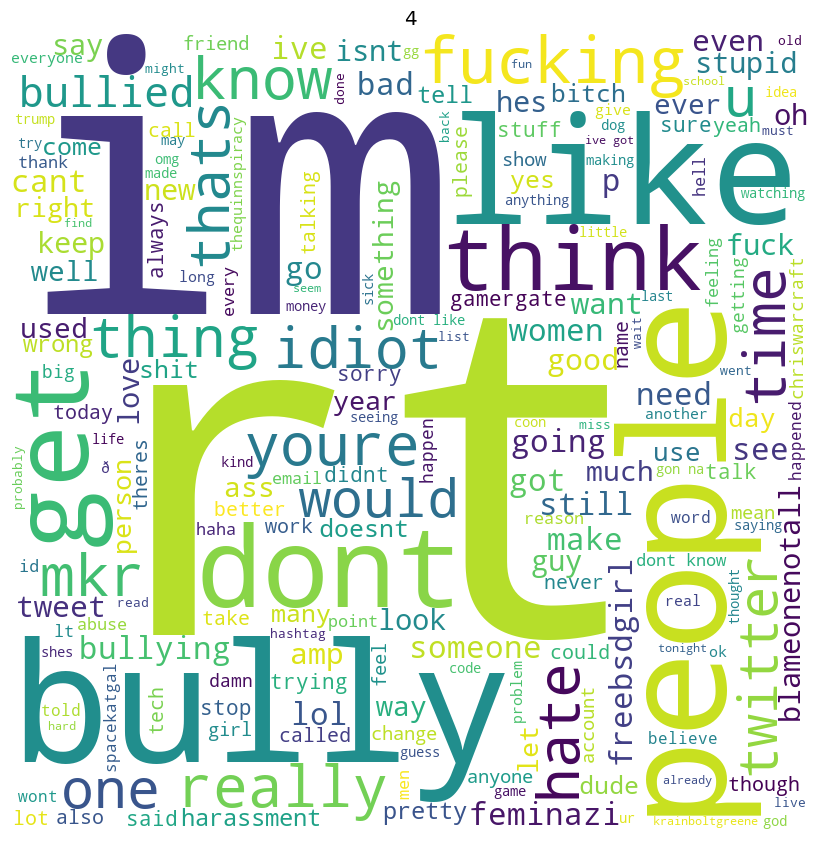

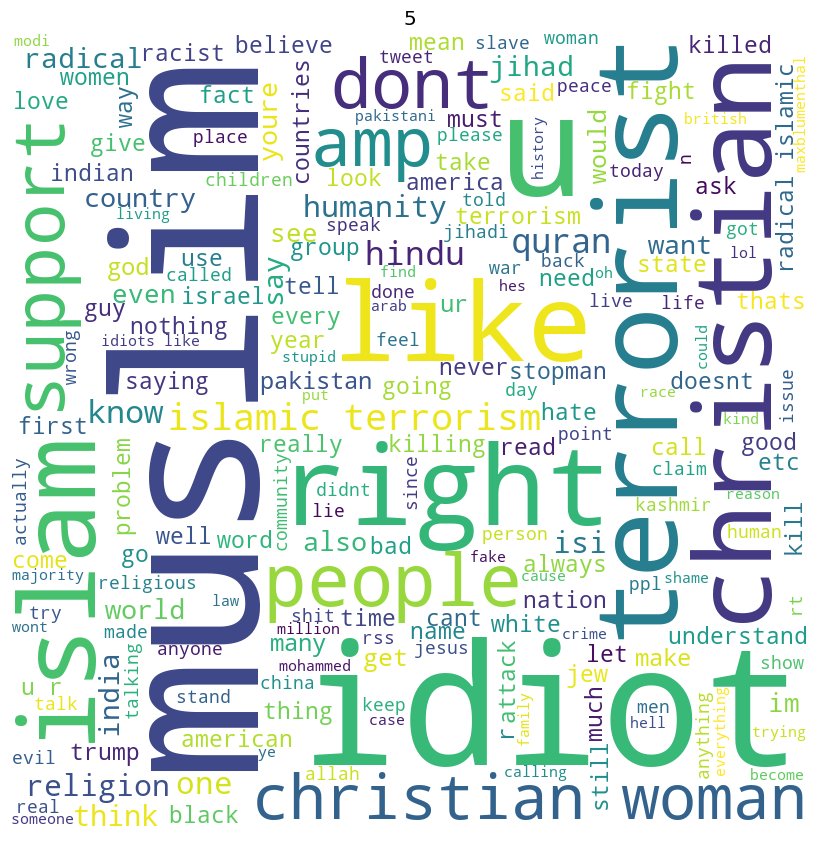

In [103]:
#creating word clouds for each cyberbullying_type, the larger the words the more frequent in tweet.
for c in range(len(lenc.classes_)):
    string = ""
    for i in cb_df[cb_df.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stop_words),
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

### N-Grams

In [111]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
#setting the ngram to four.
vec = TfidfVectorizer(ngram_range=(1,4)).fit(cb_df['tweet_text'])
feature_names = vec.get_feature_names_out()

x = cb_df['tweet_text']
y = cb_df['cyberbullying_type']
X = vec.transform(x)

### Training Data

In [112]:
#splitting the data into testing and training sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

print ("Shapes")
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

Shapes
(8275, 589242)
(3547, 589242)
(8275,)
(3547,)


### Modeling

In [113]:
logreg =LogisticRegression()
logreg.fit(train_x, train_y)
#train model
logreg_predict = logreg.predict(test_x)
logreg_acc = accuracy_score(logreg_predict, test_y)
logreg_rec = recall_score(logreg_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(logreg_acc*100))
print("recall:{:.2f}%".format(logreg_rec*100))

accuracy:80.29%
recall:80.29%


In [114]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_x, train_y)
#train model
rfc_predict = rfc.predict(test_x)
rfc_acc = accuracy_score(rfc_predict, test_y)
rfc_rec = recall_score(rfc_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(rfc_acc*100))
print("recall:{:.2f}%".format(rfc_rec*100))

accuracy:73.98%
recall:73.98%


In [115]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
#train model
dtc_predict = dtc.predict(test_x)
dtc_acc = accuracy_score(dtc_predict, test_y)
dtc_rec = recall_score(dtc_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(dtc_acc*100))
print("recall:{:.2f}%".format(dtc_rec*100))

accuracy:79.45%
recall:79.45%


In [116]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
#train model
knn_predict = knn.predict(test_x)
knn_acc = accuracy_score(knn_predict, test_y)
knn_rec = recall_score(knn_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(knn_acc*100))
print("recall:{:.2f}%".format(knn_rec*100))

accuracy:64.34%
recall:64.34%


In [117]:
nbs = MultinomialNB()
nbs.fit(train_x, train_y)
#train model
nbs_predict = nbs.predict(test_x)
nbs_acc = accuracy_score(nbs_predict, test_y)
nbs_rec = recall_score(nbs_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(nbs_acc*100))
print("recall:{:.2f}%".format(nbs_rec*100))

accuracy:70.40%
recall:70.40%


In [118]:
clf = LinearSVC()
clf.fit(train_x, train_y)
#train model
clf_predict = clf.predict(test_x)
clf_acc = accuracy_score(clf_predict, test_y)
clf_rec = recall_score(clf_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(clf_acc*100))
print("recall:{:.2f}%".format(clf_rec*100))

accuracy:82.49%
recall:82.49%


### Vectorizing

In [120]:
#Convert a collection of text documents to a matrix of token counts.
vec = CountVectorizer(binary=True, stop_words="english")
X = vec.fit_transform(cb_df["tweet_text"])
df_tf = pd.DataFrame(X.todense(), columns=vec.get_feature_names_out())
df_tf

__  ___  ____  ________  ___itsmeee  ___mntana  __citgo  __enimey__  \
0       0    0     0         0           0          0        0           0   
1       0    0     0         0           0          0        0           0   
2       0    0     0         0           0          0        0           0   
3       0    0     0         0           0          0        0           0   
4       0    0     0         0           0          0        0           0   
...    ..  ...   ...       ...         ...        ...      ...         ...   
11817   0    0     0         0           0          0        0           0   
11818   0    0     0         0           0          0        0           0   
11819   0    0     0         0           0          0        0           0   
11820   0    0     0         0           0          0        0           0   
11821   0    0     0         0           0          0        0           0   

       __qn  _adams_j  ...  ᵗʳᵃⁱˡ  ᵗʳⁱᵍᵍᵉʳ  ᶠⁱⁿᵍᵉʳ  ハワイニュース  ハワイニュースナウ  \
0         0         0  ...      0        0       0        0          0   
1         0         0  ...      0        0       0        0          0   
2         0         0  ...      0        0       0        0          0   
3         0         0  ...      0        0       0        0          0   
4         0         0  ...      0        0       0        0          0   
...     ...       ...  ...    ...      ...     ...      ...        ...   
11817     0         0  ...      0        0       0        0          0   
11818     0         0  ...      0        0       0        0          0   
11819     0         0  ...      0        0       0        0          0   
11820     0         0  ...      0        0       0        0          0   
11821     0         0  ...      0        0       0        0          0   

       ハワイリアルニュース  ハワイロールニュース  中川大志  少年的你  石井杏奈  
0               0           0     0     0     0  
1               0           0     0     0     0  
2               0           0     0     0     0  
3               0           0     0     0     0  
4               0           0     0     0     0  
...           ...         ...   ...   ...   ...  
11817           0           0     0     0     0  
11818           0           0     0     0     0  
11819           0           0     0     0     0  
11820           0           0     0     0     0  
11821           0           0     0     0     0  

[11822 rows x 25967 columns]

### TensorFlow with Keras and Modeling

In [121]:
train_x, test_x, train_y, test_y = train_test_split(df_tf, cb_df["cyberbullying_type"], test_size=0.2, random_state=123)
# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
df_train_y = pd.DataFrame(train_y, columns=["cyberbullying_type"])
df_test_y = pd.DataFrame(test_y, columns=["cyberbullying_type"])

In [128]:
input_dim = train_x.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(5, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 129840    
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 129,846
Trainable params: 129,846
Non-trainable params: 0
_________________________________________________________________


In [126]:
history = model.fit(train_x, train_y,
                     epochs=125,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size=15)

In [129]:
history.params

{'verbose': False, 'epochs': 125, 'steps': 631}

In [130]:
history.history

{'loss': [-14747107.0,
  -1.0841593745506304e+16,
  -8.039340098367618e+24,
  -5.92980520766927e+33,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'accuracy': [0.16886961460113525,
  0.168869614601

In [131]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

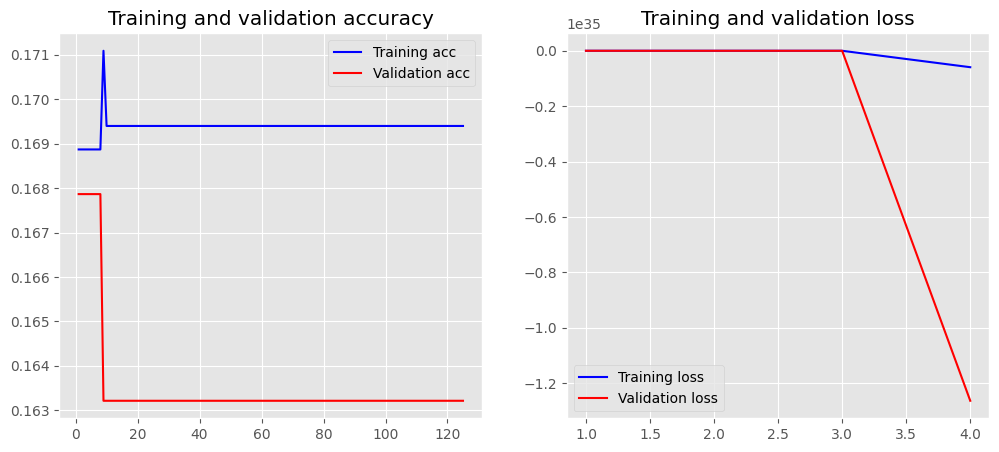

In [132]:
plot_history(history)

In [133]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.1780
Testing Accuracy:  0.1700


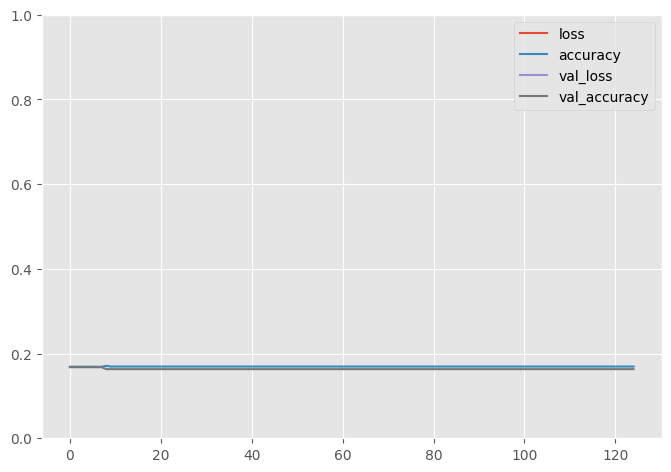

In [134]:
pd.DataFrame(history.history).plot(figsize=(8, 5.5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [135]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.1780
Testing Accuracy:  0.1700


In [136]:
train_x.shape

(9457, 25967)

In [137]:
train_y.shape

(9457,)

In [138]:
X_valid, X_train = train_x[:1000], train_x[1000:]
y_valid, y_train = train_y[:1000], train_y[1000:]

In [139]:
history = model.fit(train_x, train_y,
                     epochs=125,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size=15)

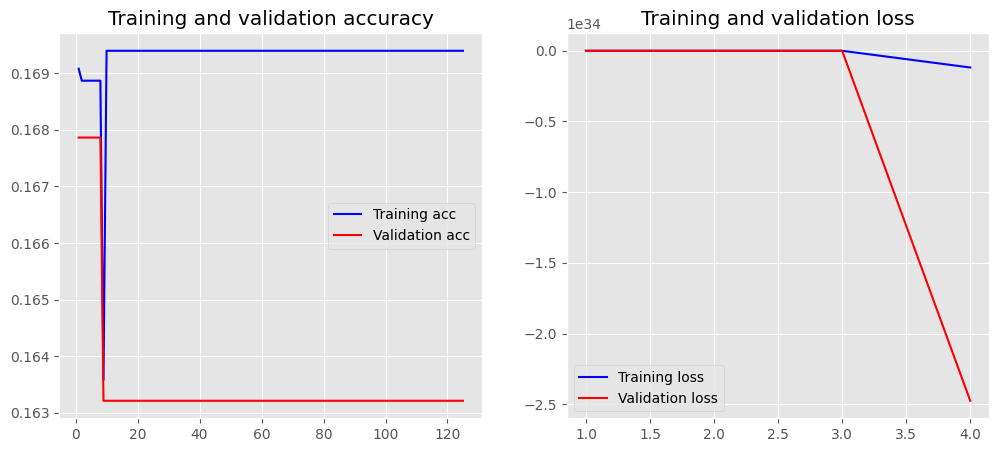

In [140]:
plot_history(history)

In [141]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.1696
Testing Accuracy:  0.1632


In [142]:
logreg =LogisticRegression()
logreg.fit(train_x, train_y)
#train model
logreg_predict = logreg.predict(test_x)
logreg_acc = accuracy_score(logreg_predict, test_y)
logreg_rec = recall_score(logreg_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(logreg_acc*100))
print("recall:{:.2f}%".format(logreg_rec*100))

accuracy:82.11%
recall:82.11%


In [143]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_x, train_y)
#train model
rfc_predict = rfc.predict(test_x)
rfc_acc = accuracy_score(rfc_predict, test_y)
rfc_rec = recall_score(rfc_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(rfc_acc*100))
print("recall:{:.2f}%".format(rfc_rec*100))

accuracy:79.66%
recall:79.66%


In [144]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
#train model
dtc_predict = dtc.predict(test_x)
dtc_acc = accuracy_score(dtc_predict, test_y)
dtc_rec = recall_score(dtc_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(dtc_acc*100))
print("recall:{:.2f}%".format(dtc_rec*100))

accuracy:79.49%
recall:79.49%


In [145]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
#train model
knn_predict = knn.predict(test_x)
knn_acc = accuracy_score(knn_predict, test_y)
knn_rec = recall_score(knn_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(knn_acc*100))
print("recall:{:.2f}%".format(knn_rec*100))

accuracy:61.99%
recall:61.99%


In [146]:
nbs = MultinomialNB()
nbs.fit(train_x, train_y)
#train model
nbs_predict = nbs.predict(test_x)
nbs_acc = accuracy_score(nbs_predict, test_y)
nbs_rec = recall_score(nbs_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(nbs_acc*100))
print("recall:{:.2f}%".format(nbs_rec*100))

accuracy:74.71%
recall:74.71%


In [147]:
clf = LinearSVC()
clf.fit(train_x, train_y)
#train model
clf_predict = clf.predict(test_x)
clf_acc = accuracy_score(clf_predict, test_y)
clf_rec = recall_score(clf_predict, test_y, average='micro')
#print predicted results
print("accuracy:{:.2f}%".format(clf_acc*100))
print("recall:{:.2f}%".format(clf_rec*100))

accuracy:81.35%
recall:81.35%


### Grid Search

In [148]:
warnings.filterwarnings("ignore")
skf = StratifiedKFold(n_splits=5, random_state=None)

fold = 0
f1 = []
precision =[]
recall=[]
accuracy=[]
features = []
for train_index, test_index in skf.split(df_tf, cb_df["cyberbullying_type"]):
    fold += 1
    print ("Fold %d" % fold)
    # partition
    train_x, test_x = df_tf.iloc[train_index], df_tf.iloc[test_index]
    train_y, test_y = cb_df["cyberbullying_type"].iloc[train_index], cb_df["cyberbullying_type"].iloc[test_index]
    
    X = train_x
    X_test = test_x
    
    # convert numpy arrays to data frames
    df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
    df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
    df_train_y = pd.DataFrame(train_y, columns=["cyberbullying_type"])
    df_test_y = pd.DataFrame(test_y, columns=["cyberbullying_type"])
    
    #feature selection
    f_val, p_val = chi2(df_train_x, df_train_y["cyberbullying_type"]) 

    # print the Chi-squared valus and p values
    df_scores = pd.DataFrame(zip(df_tf.columns, f_val, p_val), columns=["feature", "chi2", "p"])
    df_scores["chi2"] = df_scores["chi2"].round(2)
    df_scores["p"] = df_scores["p"].round(3)

    # use features with p < 0.05
    sel_ohe_cols = df_scores[df_scores["p"]<0.05]["feature"].values
    
    # train model
    clf = LogisticRegression(random_state=fold)
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
    grid_clf_acc.fit(X[sel_ohe_cols], train_y)

    # predict
    pred=grid_clf_acc.predict(X_test[sel_ohe_cols])
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print (line)
    f1.append(metrics.f1_score(test_y, pred,average='micro'))
    precision.append(metrics.precision_score(test_y, pred, 
                                             pos_label='positive',
                                           average='micro'))
    recall.append(metrics.recall_score(test_y, pred, pos_label='positive',
                                           average='micro'))
    accuracy.append(metrics.accuracy_score(test_y, pred))
    
print ("Average F1: %.2f" % np.mean(f1))
print ("Average prcesion: %.2f" % np.mean(precision))
print ("Average recall: %.2f" % np.mean(recall))
print ("Average accuracy: %.2f" % np.mean(accuracy))

Fold 1
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       398
           1       0.98      0.97      0.97       399
           2       0.90      0.82      0.86       398
           3       0.58      0.66      0.62       396
           4       0.63      0.63      0.63       375
           5       0.96      0.93      0.95       399

    accuracy                           0.83      2365
   macro avg       0.84      0.83      0.83      2365
weighted avg       0.84      0.83      0.83      2365

Fold 2
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       398
           1       0.98      0.97      0.98       399
           2       0.87      0.81      0.84       398
           3       0.58      0.64      0.61       396
           4       0.60      0.59      0.60       375
           5       0.96      0.95      0.95       399

    accuracy                           0.83      2365
   macro 